# GB National Grid Data

.

.

__Source__: https://www.gridwatch.templar.co.uk/index.php

__Period__: 13 May 2011 to 22 March 2021

__Features__
- __Demand__: 

.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

.

## 1. Load data

In [11]:
# Load data as a dataframe
grid_df = pd.read_csv('gridwatch1.csv', parse_dates=[' timestamp'])

grid_df.tail()

,id,timestamp,demand,frequency,coal,nuclear,ccgt,wind,pumped,hydro,...,french_ict,dutch_ict,irish_ict,ew_ict,nemo,other,north_south,scotland_england,ifa2,nsl
1089505,1089510,2021-10-12 11:06:09,33278,49.971001,972,3966,18134,4358,0,345,...,0,739.0,-454,-348.0,993,79,-789,-754,722,697
1089506,1089511,2021-10-12 11:10:42,33538,49.915001,979,3965,18243,4311,200,328,...,0,795.0,-454,-348.0,936,79,-782,-911,731,697
1089507,1089512,2021-10-12 11:15:37,33537,49.929001,1003,3969,18301,4237,179,328,...,0,798.0,-454,-348.0,935,80,-839,-896,733,697
1089508,1089513,2021-10-12 11:20:39,33585,49.923000,1015,3971,18394,4194,170,328,...,0,798.0,-454,-348.0,935,79,-769,-815,733,697
1089509,1089514,2021-10-12 11:25:40,33618,50.002998,1023,3970,18406,4111,262,328,...,0,798.0,-454,-348.0,935,79,-730,-822,733,697


In [3]:
grid_df.shape

(1089510, 24)

In [20]:
grid_df.describe()

,id,demand,frequency,coal,nuclear,ccgt,wind,pumped,hydro,biomass,...,ocgt,french_ict,dutch_ict,irish_ict,ew_ict,nemo,other,north_south,scotland_england,ifa2
count,1.030800e+06,1.030800e+06,1.030800e+06,1.030800e+06,1.030800e+06,1.030800e+06,1.030800e+06,1.030800e+06,1.030800e+06,1.030800e+06,...,1.030800e+06,1.030800e+06,1.030800e+06,1.030800e+06,1.030800e+06,1.030800e+06,1.030800e+06,1.030800e+06,1.030800e+06,1.030800e+06
mean,5.154044e+05,3.292054e+04,4.995832e+01,6.610744e+03,6.917372e+03,1.168249e+04,3.367329e+03,2.853109e+02,4.183022e+02,1.266388e+03,...,5.163130e+00,1.188175e+03,7.043560e+02,-8.435889e+01,-6.432577e+30,1.354576e+02,4.081659e+01,1.019716e+03,8.123126e+02,1.156626e+01
std,2.975667e+05,7.289714e+03,1.470633e+00,6.447153e+03,1.104888e+03,5.189852e+03,2.790314e+03,3.393522e+02,2.519826e+02,8.519574e+02,...,3.294656e+01,9.387131e+02,4.303348e+02,2.060630e+02,2.893069e+33,3.277746e+02,7.057569e+01,1.692049e+03,1.287459e+03,1.007113e+02
min,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-2.052000e+03,-1.072000e+03,-5.000000e+02,-1.313282e+36,-1.022000e+03,0.000000e+00,-4.498000e+03,-2.679000e+03,0.000000e+00
25%,2.577048e+05,2.717400e+04,4.995900e+01,6.440000e+02,6.229000e+03,7.470000e+03,1.213000e+03,0.000000e+00,2.110000e+02,6.590000e+02,...,0.000000e+00,9.270000e+02,5.400000e+02,-2.520000e+02,-2.340000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.154045e+05,3.228500e+04,4.999800e+01,4.564000e+03,7.089000e+03,1.146700e+04,2.563000e+03,2.800000e+02,3.880000e+02,1.167000e+03,...,0.000000e+00,1.494000e+03,9.090000e+02,-8.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.731042e+05,3.816400e+04,5.004300e+01,1.197400e+04,7.768000e+03,1.543800e+04,4.725000e+03,4.220000e+02,5.930000e+02,2.015000e+03,...,0.000000e+00,1.992000e+03,9.990000e+02,7.400000e+01,8.200000e+01,0.000000e+00,7.600000e+01,1.957000e+03,1.467000e+03,0.000000e+00
max,1.030804e+06,2.548520e+05,5.040300e+01,2.530000e+04,9.346000e+03,2.716300e+04,1.403100e+04,2.861000e+03,1.434000e+03,3.290000e+03,...,1.314000e+03,3.276000e+03,1.204000e+03,4.360000e+02,5.710000e+02,1.769000e+03,2.821000e+03,9.813000e+03,6.115000e+03,1.020000e+03


In [4]:
grid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089510 entries, 0 to 1089509
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   id                 1089510 non-null  int64         
 1    timestamp         1089510 non-null  datetime64[ns]
 2    demand            1089510 non-null  int64         
 3    frequency         1089510 non-null  float64       
 4    coal              1089510 non-null  int64         
 5    nuclear           1089510 non-null  int64         
 6    ccgt              1089510 non-null  int64         
 7    wind              1089510 non-null  int64         
 8    pumped            1089510 non-null  int64         
 9    hydro             1089510 non-null  int64         
 10   biomass           1089510 non-null  int64         
 11   oil               1089510 non-null  int64         
 12   solar             1089510 non-null  float64       
 13   ocgt              1089510 

__NOTE__: All features are numeric __except timestamp__. Change that column to __timeseries__.

In [5]:
# Seems all the columns have a space ' ' before the column name. Lets remove that space
new_columns = []
for i in range(1, len(grid_df.columns)): # note that the id column has NO space, hence range starts from 1
    temp = grid_df.columns[i].split(' ')[1]
    new_columns.append(temp)

In [6]:
# The id column is useless, lets remove it RUN ONCE
grid_df.drop('id', axis=1, inplace=True)

In [7]:
# Set the new_columns as the new column names of grid_df
grid_df.columns = new_columns
grid_df.columns

Index(['timestamp', 'demand', 'frequency', 'coal', 'nuclear', 'ccgt', 'wind',
       'pumped', 'hydro', 'biomass', 'oil', 'solar', 'ocgt', 'french_ict',
       'dutch_ict', 'irish_ict', 'ew_ict', 'nemo', 'other', 'north_south',
       'scotland_england', 'ifa2', 'nsl'],
      dtype='object')

In [8]:
# Create a YEAR, MONTH  columns
grid_df['year'] = pd.DatetimeIndex(grid_df['timestamp']).year
grid_df['month'] = pd.DatetimeIndex(grid_df['timestamp']).month

In [9]:
# Create a dataframe for a heatmap
grouped_Y_M = grid_df.groupby(['year', 'month']).sum().unstack()

[Text(0.5, 1.0, 'Sum of demand per month & year')]

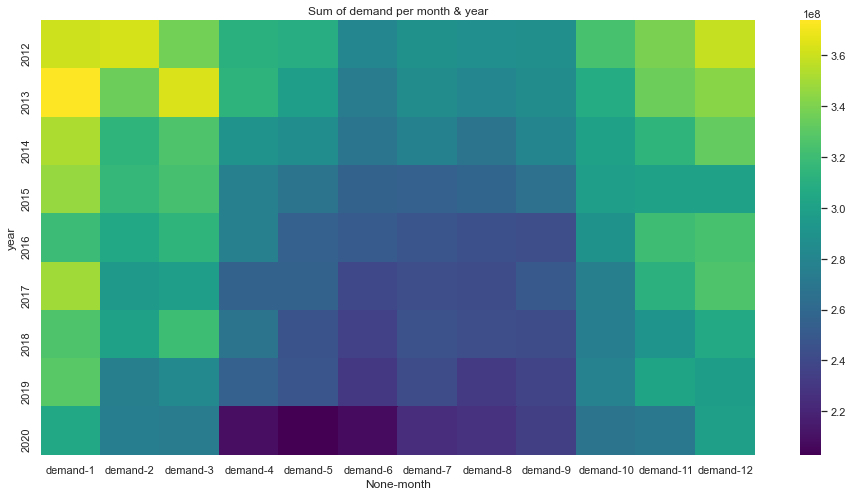

In [10]:
# Heatmap
fig, ax = plt.subplots(figsize=(16, 8))

fig = sns.heatmap(data=grouped_Y_M.iloc[1:-1, 0: 12], cmap='viridis',
                 linewidths=0.0, annot=False)

ax.set(title='Sum of demand per month & year')

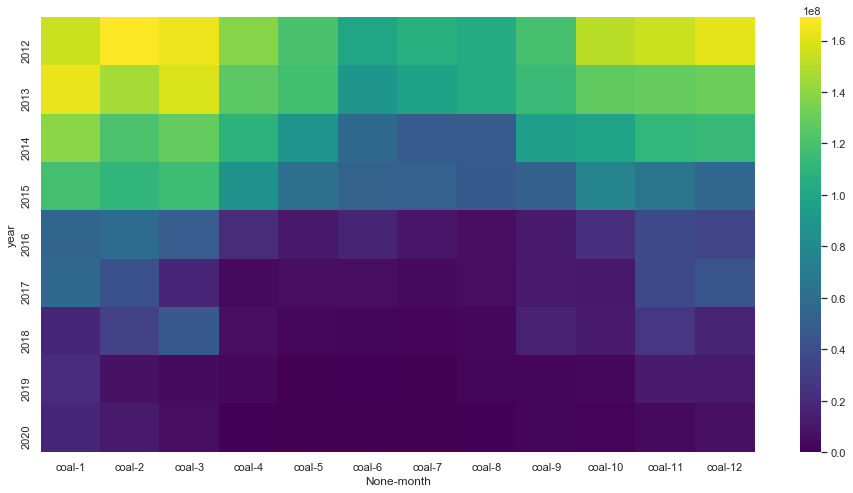

In [15]:
# Heatmap
fig, ax = plt.subplots(figsize=(16, 8))

fig = sns.heatmap(data=grouped_Y_M.iloc[1:-1, 24: 36], cmap='viridis',
                 linewidths=0.0, annot=False)

In [12]:
grouped_Y_M.iloc[:, 12: 24]

frequency                                               \
month             1              2              3              4    
year                                                                
2011             NaN            NaN            NaN            NaN   
2012   445605.400182  417447.988646  445713.351277  431263.677046   
2013   444881.691092  398902.764917  445744.448206  428956.824222   
2014   444947.809419  402515.568115  444749.075234  432007.450258   
2015   446401.574329  403156.274218  446402.594164  431905.874101   
2016   436408.113074  417108.321100  446258.564967  431958.292958   
2017   443671.209382  401963.816009  446413.963977  431118.200101   
2018   444845.892766  403103.515971  445601.242762  431972.340083   
2019   445824.904794  403226.341003  446422.316001  432025.906812   
2020   446426.023093  416272.770057  446418.235212  432028.807302   
2021   446217.258948  403224.356156  310727.645446            NaN   

                                                                   \
month             5              6              7              8    
year                                                                
2011    62352.417053  430902.916180  445908.601208  442418.635224   
2012   445460.344064  431354.888144  446313.362979  445562.841077   
2013   446154.948016  430247.349010  439908.349091  446103.300946   
2014   446299.046070  415312.295862  443803.839286  446406.659230   
2015   446406.912360  431965.033741  437254.005887  446310.485235   
2016   446413.887259  431663.730000  446415.548093  446412.177272   
2017   445865.237253  431762.656283  446415.886930  446408.090302   
2018   446309.419848  431826.980008  446415.394981  446438.971771   
2019   446126.466220  432026.513082  446426.831927  446176.260095   
2020   446439.153252  432031.999946  446436.962911  446438.294882   
2021             NaN            NaN            NaN            NaN   

                                                                   
month             9              10             11             12  
year                                                               
2011   431104.474240  445402.843083  428816.232815  445910.803399  
2012   431608.044210  445914.318088  430253.738251  445606.288081  
2013   431305.336016  446394.880250  431840.765054  445954.200141  
2014   432010.380178  445750.638900  428068.014825  444303.846199  
2015   431908.209171  445104.297108  427864.165903  445707.062151  
2016   417417.791029  446123.539249  431762.147127  445217.355154  
2017   432011.402986  446260.296052  431410.930987  446407.824887  
2018   415519.418657  446447.759825  426629.034250  446326.088794  
2019   432019.965149  446365.177052  431916.049089  436765.717935  
2020   432039.992800  446424.945743  431980.145927  446427.635968  
2021             NaN            NaN            NaN            NaN

C:\Users\eortiz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


ValueError: zero-size array to reduction operation fmin which has no identity

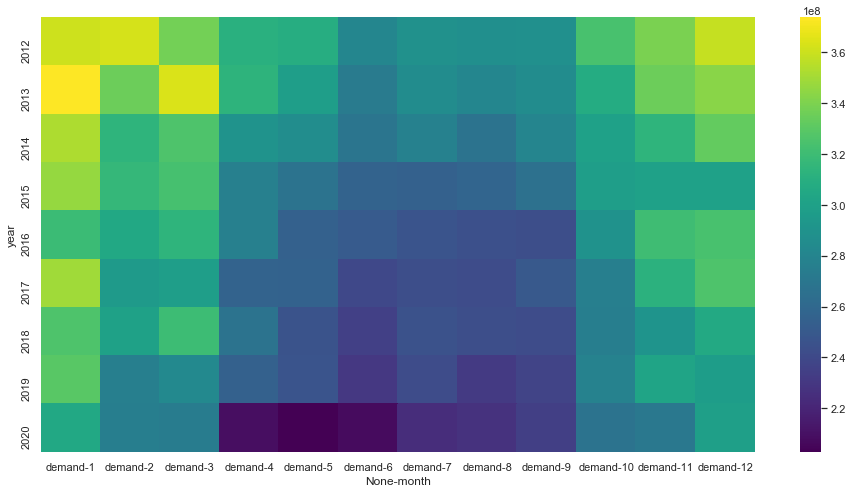

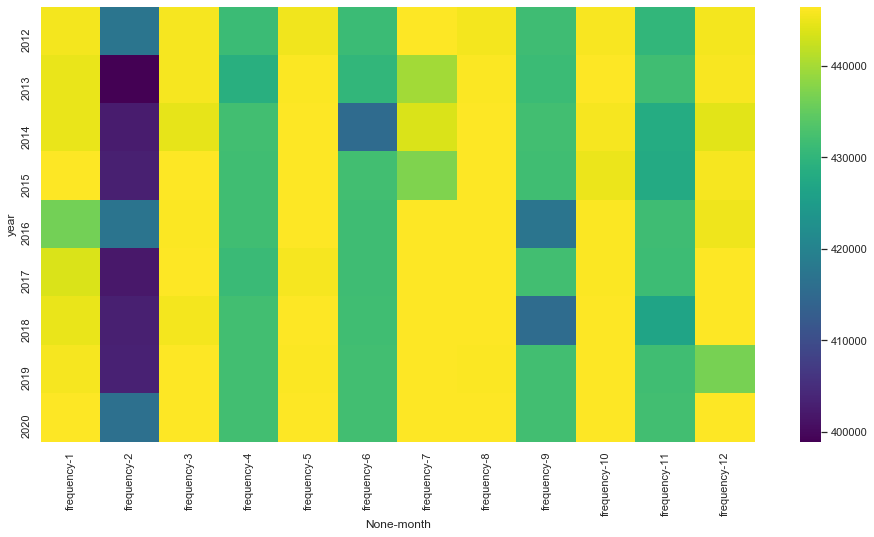

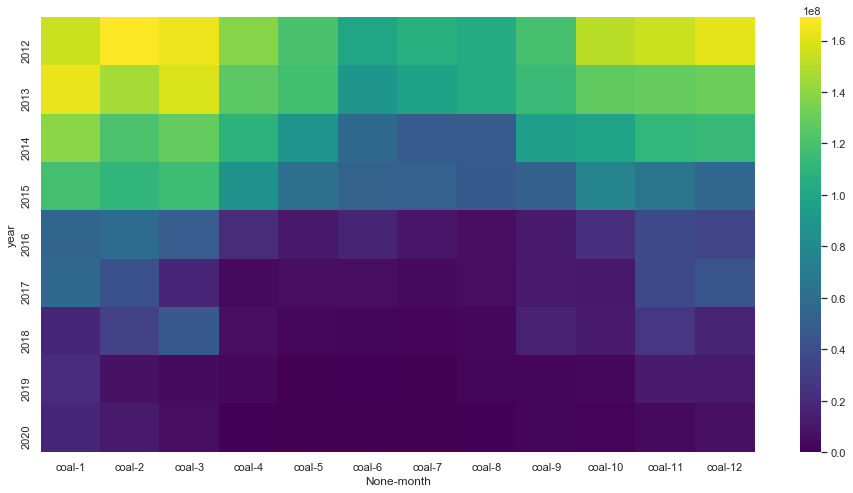

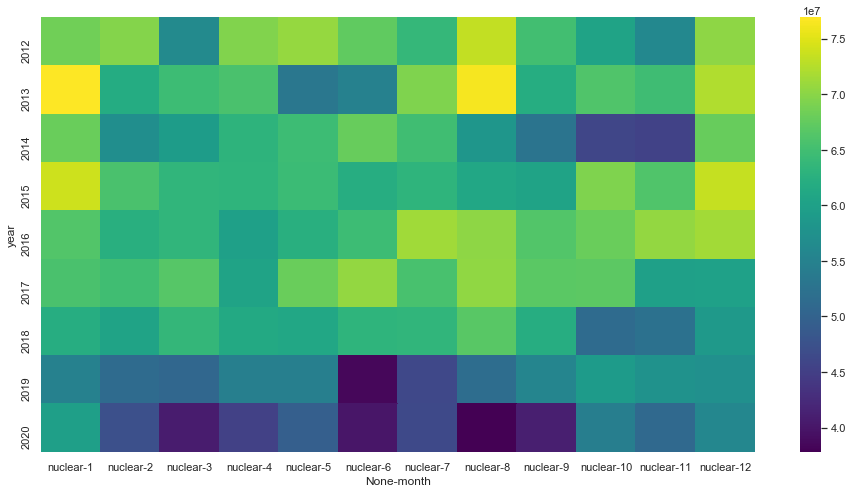

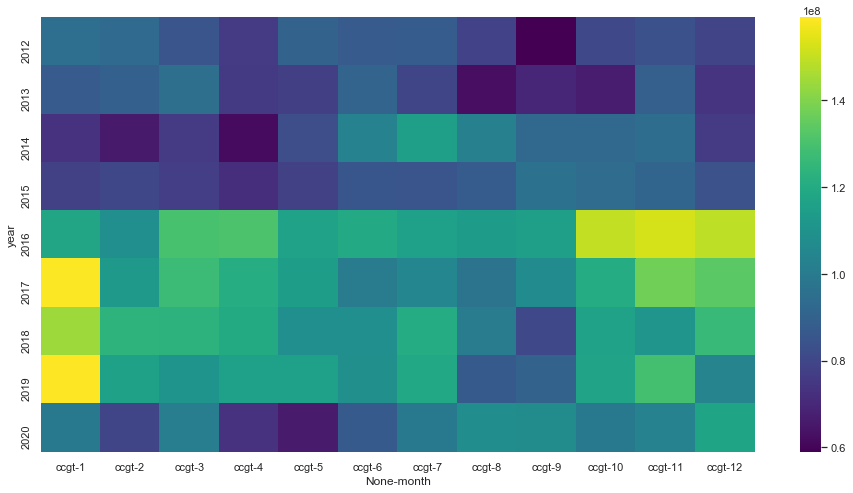

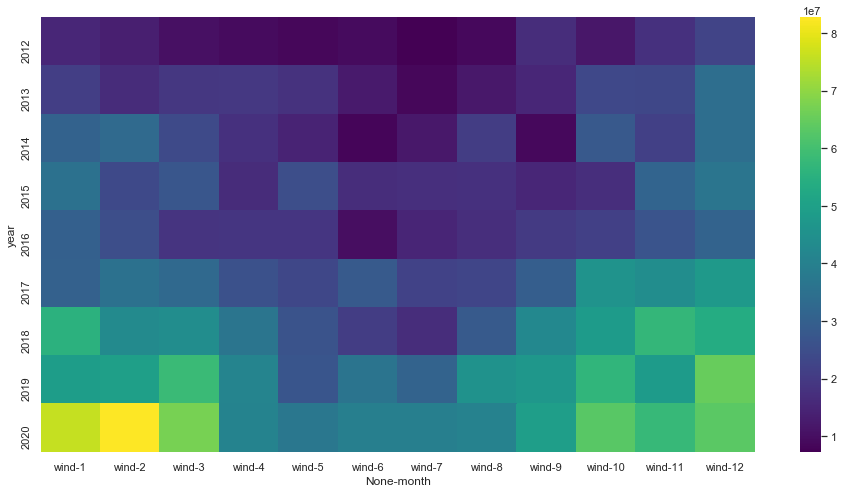

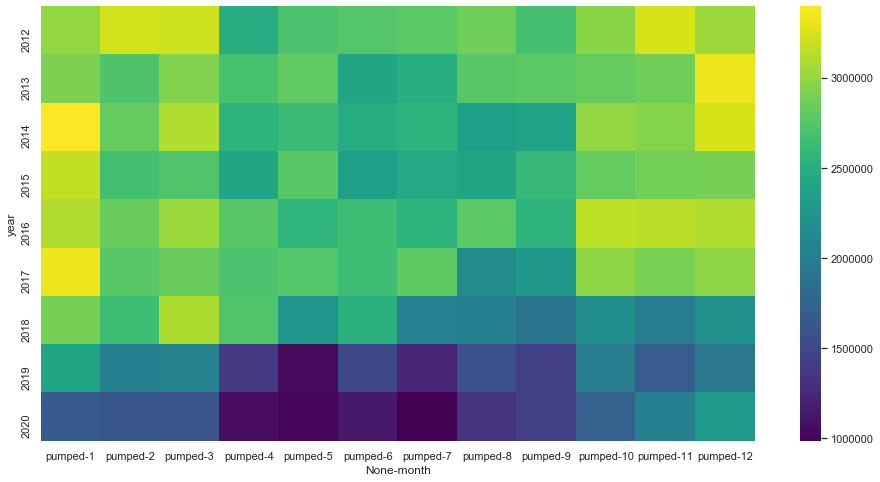

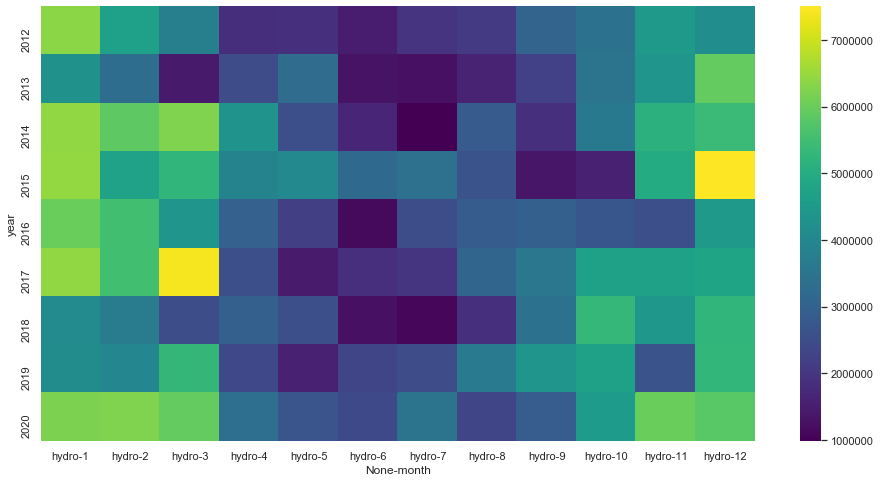

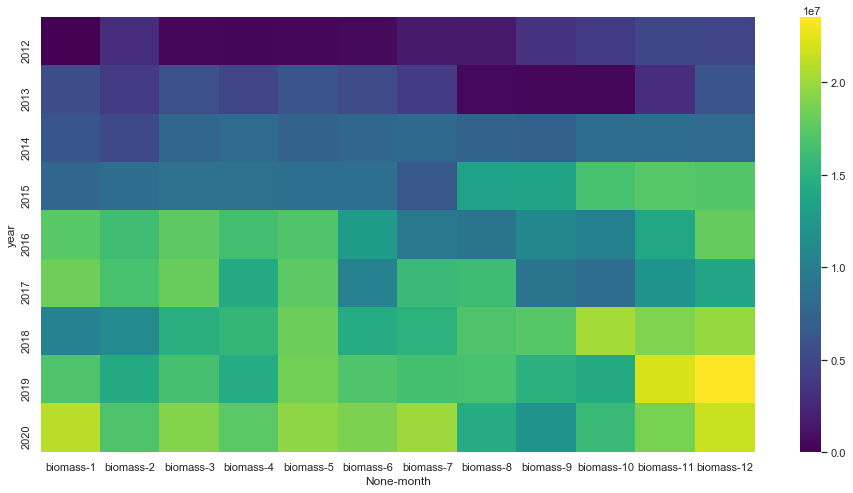

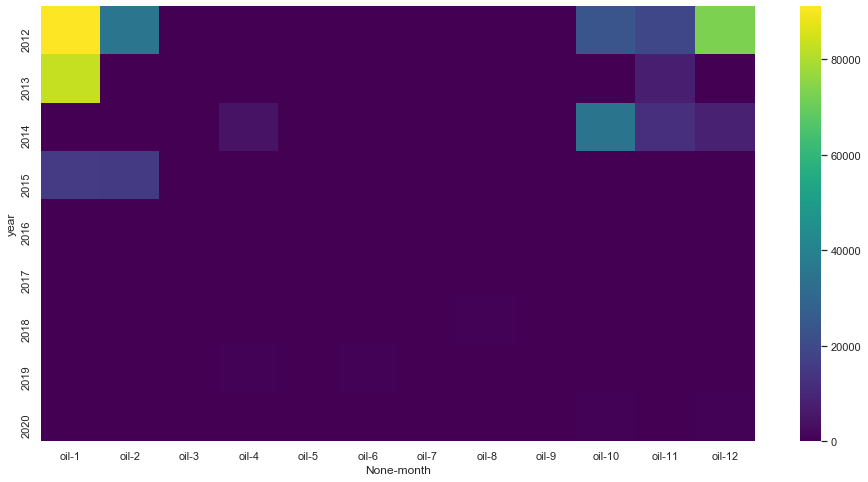

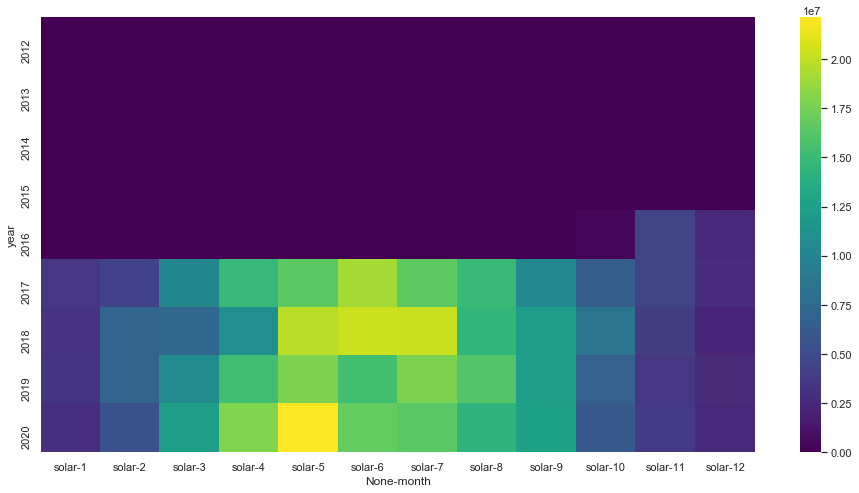

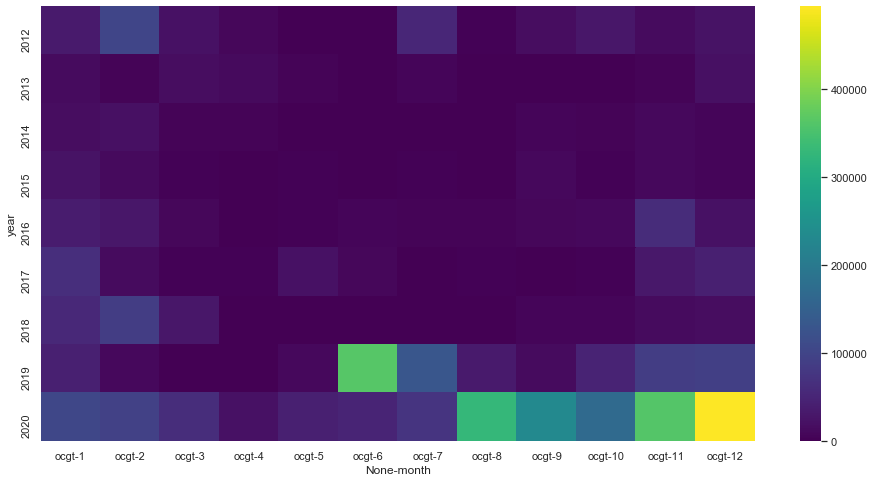

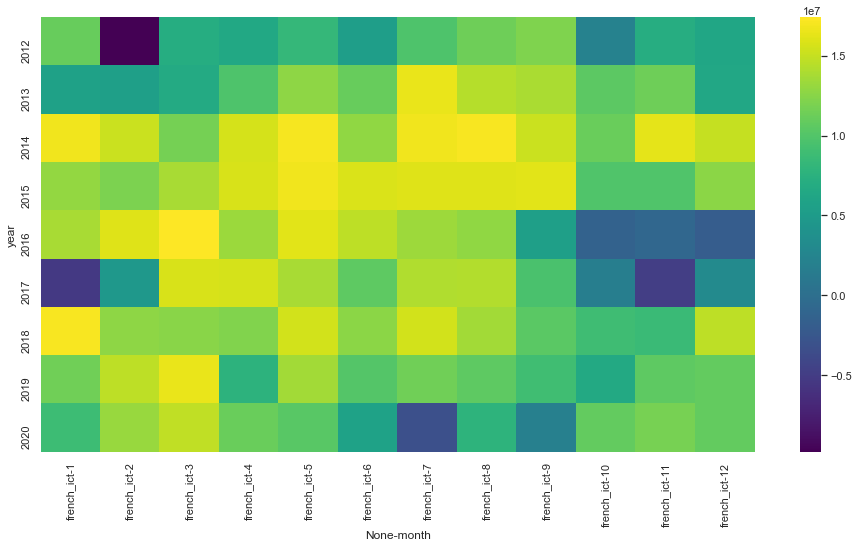

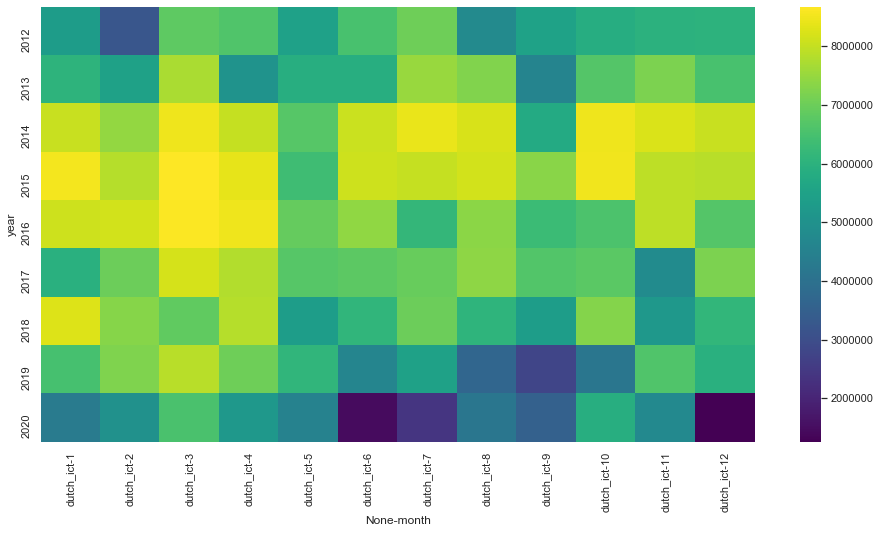

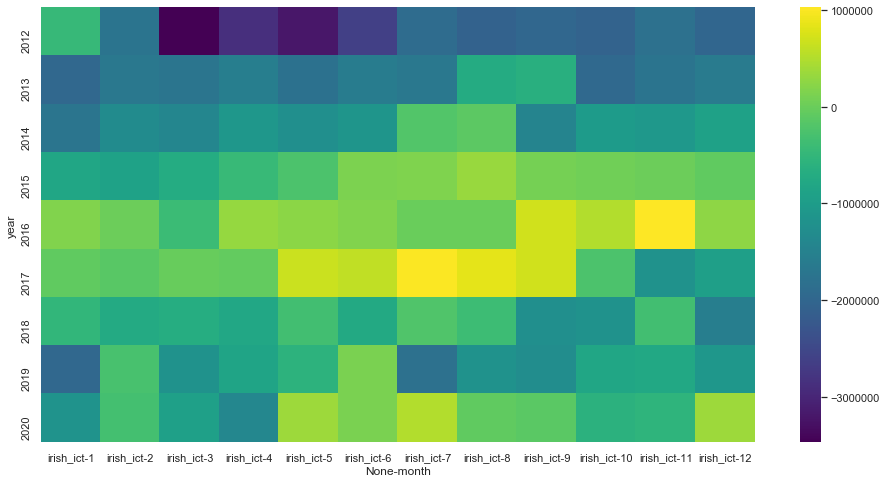

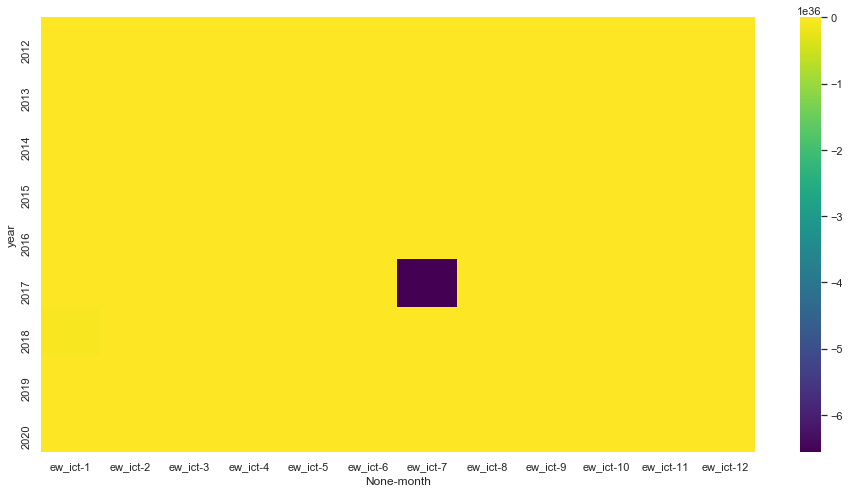

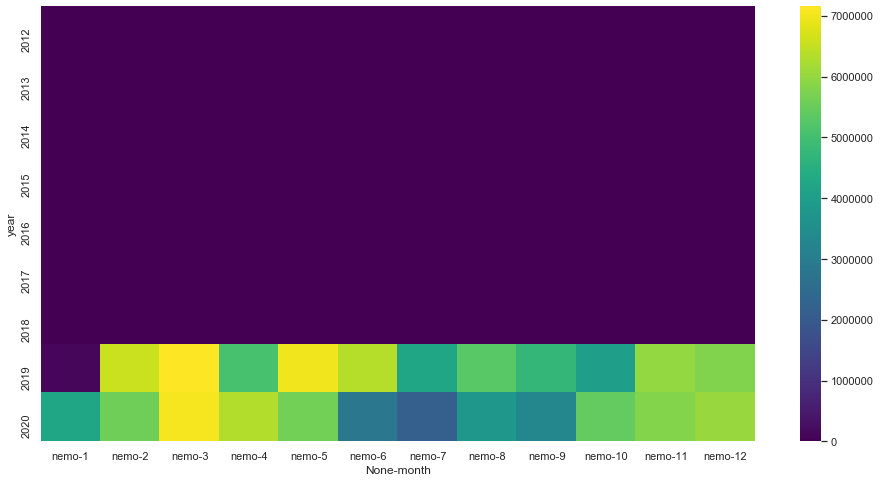

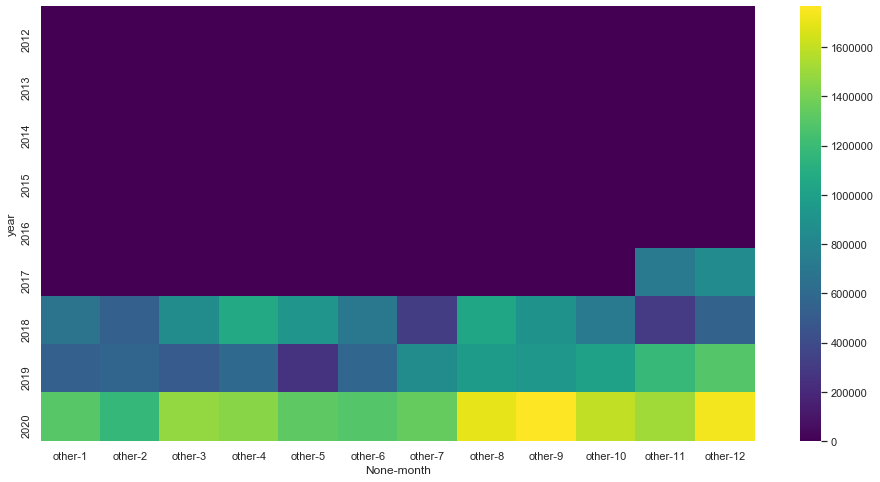

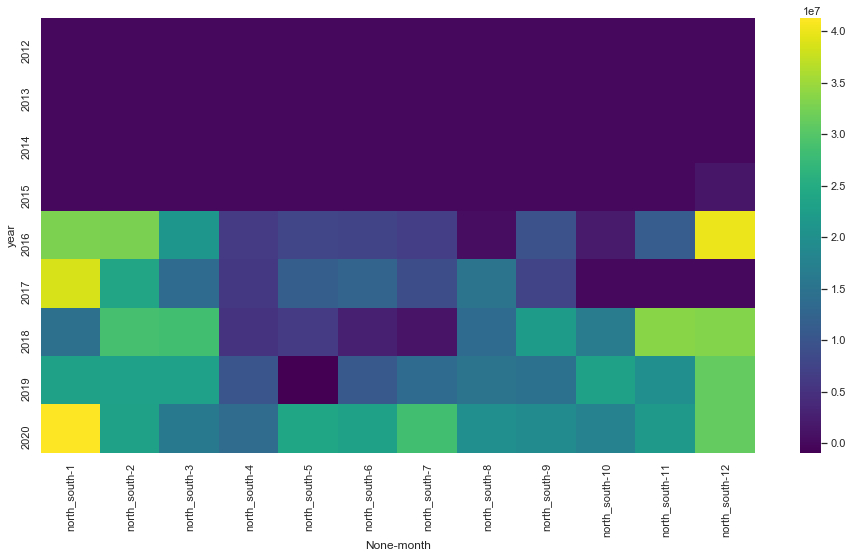

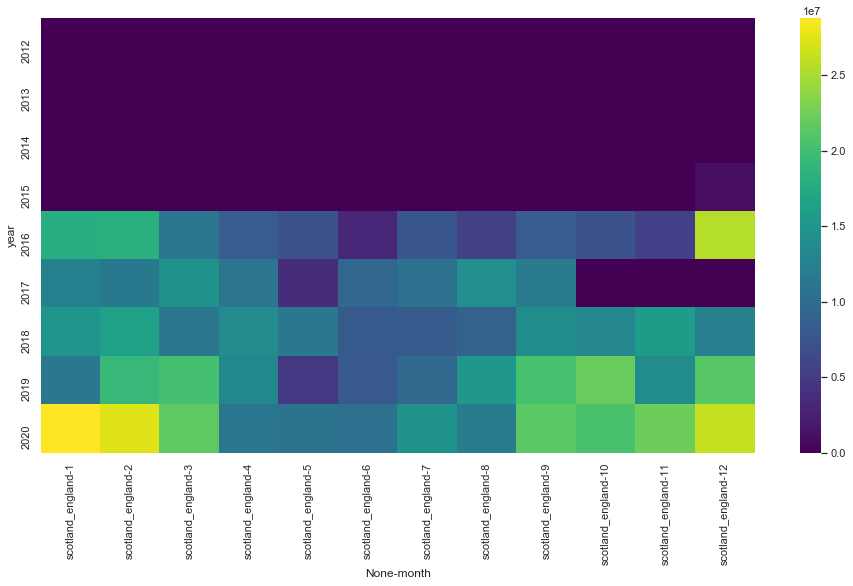

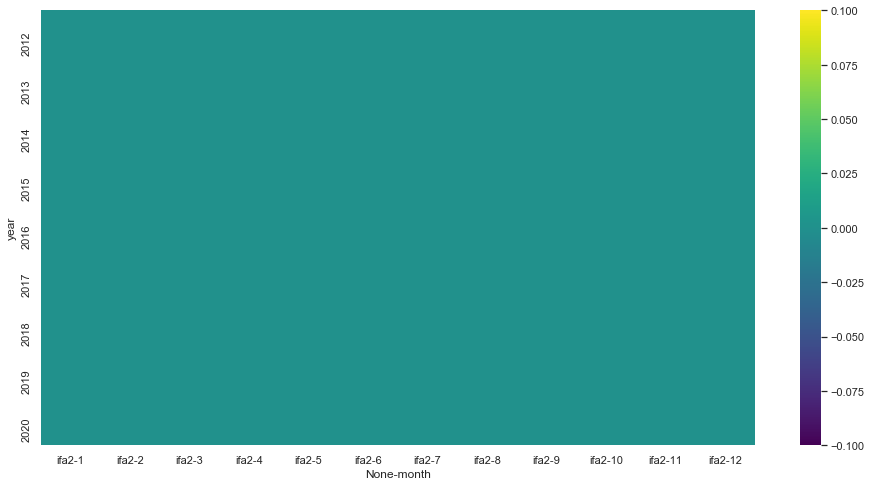

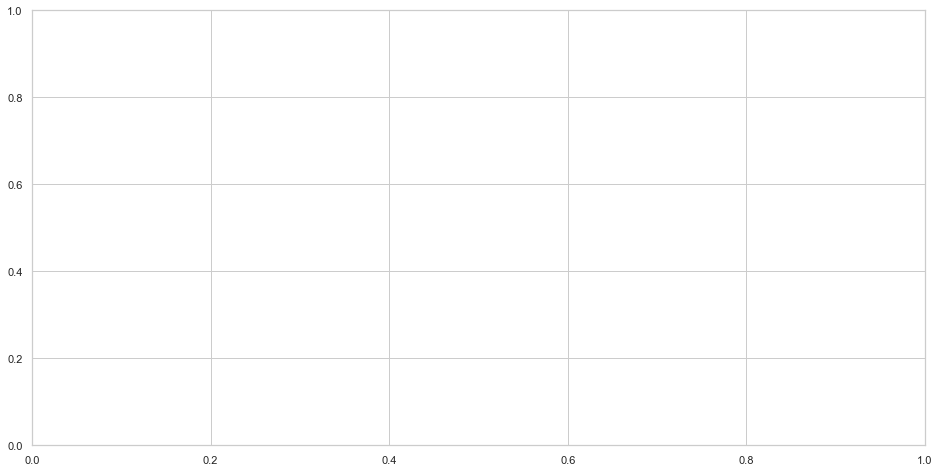

In [13]:
j=12
for i in range(len(grid_df.columns)):

    fig, ax = plt.subplots(figsize=(16, 8))
    sns.heatmap(data=grouped_Y_M.iloc[1:-1, j-12: j], cmap='viridis', linewidths=0.0, annot=False)
    plt.savefig(grid_df.columns[i + 1])
                 
    j = j + 12

In [27]:
# Group by year and see the % contribution per energy source
grouped_Y = grid_df.groupby('year').sum()

In [104]:
#grouped_Y['coal_ratio'] = grouped_Y['coal'] / grouped_Y['demand']
#grouped_Y['solar_ratio'] = grouped_Y['solar'] / grouped_Y['demand']

In [107]:
grouped_Y

,demand,frequency,coal,nuclear,ccgt,wind,pumped,hydro,biomass,oil,...,french_ict,dutch_ict,irish_ict,ew_ict,nemo,other,north_south,scotland_england,ifa2,month
year,,,,,,,,,,,,,,,,,,,,,
2011,2201485453,3.132817e+06,704880524,422182032,877680217,76468957,20822371,29254849,0,74257,...,36011986,1.785095e+07,-6395544,0.000000e+00,0,0,0,0,0,559570
2012,3847526242,5.262104e+06,1645181427,790920607,995217146,151091986,34923726,39240005,25048736,242717,...,77212934,6.918415e+07,-26164984,-1.025844e+06,0,0,0,0,0,685502
2013,3796178172,5.236395e+06,1503454027,788236744,956787770,222769726,33521326,34869253,46016528,90780,...,124540302,7.591282e+07,-18631404,-2.595703e+07,0,0,0,0,0,684071
2014,3609023530,5.226175e+06,1156030581,715178867,1035490369,253407457,33420136,46954900,89363933,60512,...,180864336,9.396307e+07,-12623856,-2.884758e+07,0,0,0,0,0,683925
2015,3463822775,5.240386e+06,892096639,786718376,1009969416,280039180,32135089,49021648,135121724,31186,...,167840360,9.567129e+07,-2337890,-1.274415e+07,0,0,1486022,960692,0,684070
2016,3391223637,5.243159e+06,333439832,796861230,1519132005,252911795,34212884,40313912,169454616,0,...,119162907,8.870309e+07,3039779,3.400564e+06,0,0,179003718,126222102,0,683286
2017,3343373235,5.249710e+06,247084364,786055429,1434547206,387554973,33107986,48003718,170876538,0,...,92939250,8.220092e+07,1140716,-6.566469e+36,0,1565648,137611364,99839327,0,685705
2018,3299257596,5.231436e+06,184086684,726964962,1383754757,472453950,28462101,38424821,193127079,462,...,154539456,7.877513e+07,-8746610,-6.423161e+34,0,8579517,207025753,148441199,0,684719
2019,3208855019,5.245322e+06,71017177,631651923,1372231757,555155029,20301775,42822962,205950508,1245,...,133240595,6.798636e+07,-11704012,2.143421e+06,62303938,9271991,206729337,179528253,0,683646


In [30]:
# Create a list of the columns to get the ratio per energy source (excludes demand, frequency and month)
ratios_list = grouped_Y.columns[2:-1]

In [36]:
for i in range(0, len(ratios_list)):
    
    grouped_Y[ratios_list[i] + '_ratio'] = grouped_Y[ratios_list[i]] / grouped_Y['demand']
    
grouped_Y.columns


Index(['demand', 'frequency', 'coal', 'nuclear', 'ccgt', 'wind', 'pumped',
       'hydro', 'biomass', 'oil', 'solar', 'ocgt', 'french_ict', 'dutch_ict',
       'irish_ict', 'ew_ict', 'nemo', 'other', 'north_south',
       'scotland_england', 'ifa2', 'month', 'coal_ratio', 'nuclear_ratio',
       'ccgt_ratio', 'wind_ratio', 'pumped_ratio', 'hydro_ratio',
       'biomass_ratio', 'oil_ratio', 'solar_ratio', 'ocgt_ratio',
       'french_ict_ratio', 'dutch_ict_ratio', 'irish_ict_ratio',
       'ew_ict_ratio', 'nemo_ratio', 'other_ratio', 'north_south_ratio',
       'scotland_england_ratio', 'ifa2_ratio'],
      dtype='object')

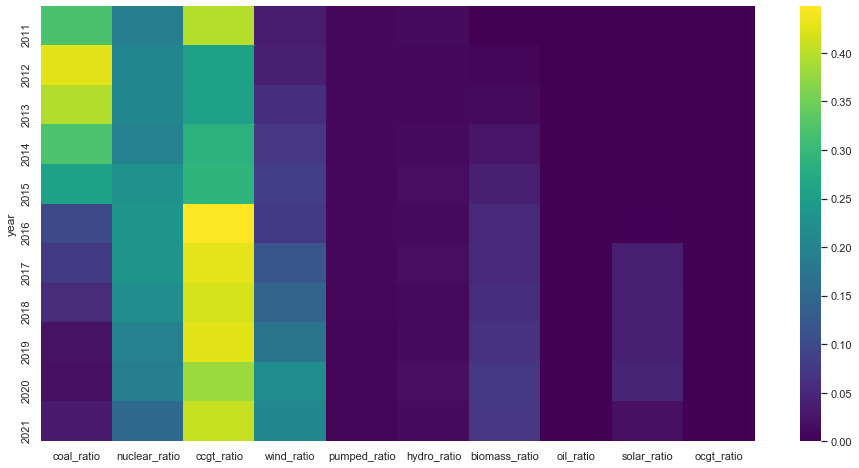

In [40]:
# Create a df for the ratios
grouped_Y_ratios = grouped_Y.loc[:, 'coal_ratio': 'ocgt_ratio']

# Create a heatmap
# Heatmap
fig, ax = plt.subplots(figsize=(16, 8))

fig = sns.heatmap(data=grouped_Y_ratios, cmap='viridis',
                 linewidths=0.0, annot=False)

In [41]:
grouped_Y_ratios

,coal_ratio,nuclear_ratio,ccgt_ratio,wind_ratio,pumped_ratio,hydro_ratio,biomass_ratio,oil_ratio,solar_ratio,ocgt_ratio
year,,,,,,,,,,
2011,0.320184,0.191771,0.398676,0.034735,0.009458,0.013289,0.000000,3.373041e-05,0.000000,0.000103
2012,0.427595,0.205566,0.258664,0.039270,0.009077,0.010199,0.006510,6.308391e-05,0.000000,0.000080
2013,0.396044,0.207640,0.252040,0.058683,0.008830,0.009185,0.012122,2.391352e-05,0.000000,0.000023
2014,0.320317,0.198164,0.286917,0.070215,0.009260,0.013010,0.024761,1.676686e-05,0.000000,0.000021
2015,0.257547,0.227124,0.291577,0.080847,0.009277,0.014152,0.039009,9.003347e-06,0.000000,0.000022
2016,0.098324,0.234977,0.447960,0.074578,0.010089,0.011888,0.049969,0.000000e+00,0.002175,0.000058
2017,0.073903,0.235108,0.429072,0.115917,0.009903,0.014358,0.051109,0.000000e+00,0.037227,0.000059
2018,0.055796,0.220342,0.419414,0.143200,0.008627,0.011647,0.058537,1.400315e-07,0.039604,0.000067
2019,0.022132,0.196847,0.427639,0.173007,0.006327,0.013345,0.064182,3.879889e-07,0.040153,0.000261


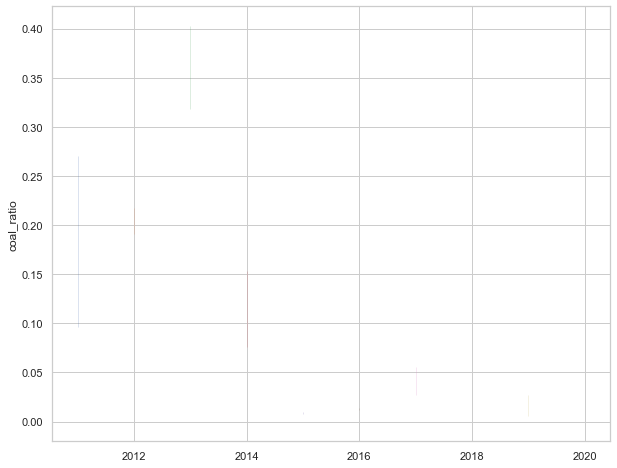

In [58]:
fig, ax = plt.subplots(figsize=(10, 8))

for i in range(0, len(grouped_Y_ratios.columns)):
    
    sns.lineplot(x=grouped_Y_ratios.index[i],y=grouped_Y_ratios.columns[i], data=grouped_Y_ratios)
                                          
    

#sns.lineplot(x=grouped_Y_ratios.index, y='coal_ratio', data=grouped_Y_ratios)

[Text(0, 0.5, 'Ratios')]

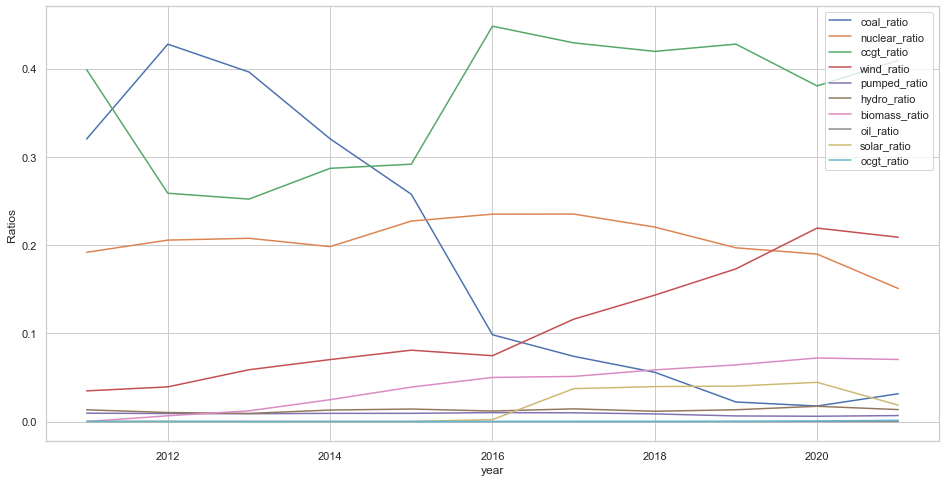

In [69]:
fig, ax = plt.subplots(figsize=(16, 8))

for i in range(0, len(grouped_Y_ratios.columns)):
    
    fig = sns.lineplot(x=grouped_Y_ratios.index, y=grouped_Y_ratios.columns[i], data=grouped_Y_ratios, 
                       label=grouped_Y_ratios.columns[i])
    
ax.legend()
ax.set(ylabel='Ratios')